In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from ImageProcessing import ImageProcessing
import numpy as np
import matplotlib.pyplot as plt

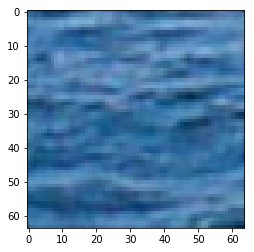

In [11]:
ip = ImageProcessing()
image = ip.read_im('images/test_ocean.png')
ip.show_im(image)

In [ ]:
vector = ip.patch_to_vector(image)
vector2 = vector - 0.5
vector2 /= np.max(np.abs(vector2),axis=0)

vector.sort()
vector2.sort()
plt.plot(range(len(vector)), vector, label="original")
plt.plot(range(len(vector2)), vector2, label="tranformed")
plt.legend()
plt.show()

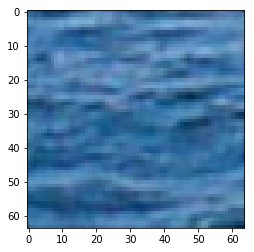

-0.4795518


In [14]:
ip.show_im(image)

print(image.min())

In [ ]:
grid,dictionary = ip.get_dictionary_patches(image, 4, 2)
ip.show_im(ip.reconstruct_image_by_grid(dictionary,grid,4,image.shape[0]))

In [ ]:
noise_image = ip.noise(image, 0.001)
ip.show_im(noise_image)

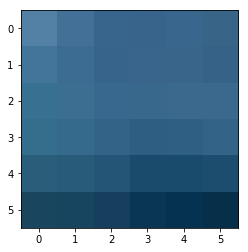

[2.6814067 0.        0.        0.        0.        0.        1.183457
 0.        0.       ]
image


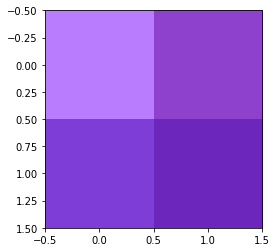

prediction


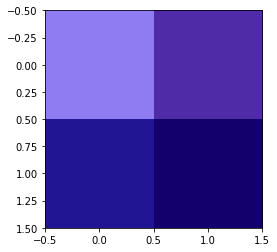

[ 2.681407  -2.9891248  0.        -2.9090402 -0.         2.4699454
 -1.183457   0.         1.2350667]
image


/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


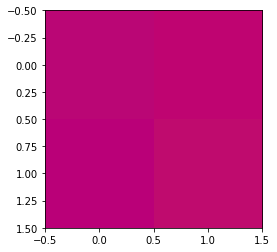

prediction


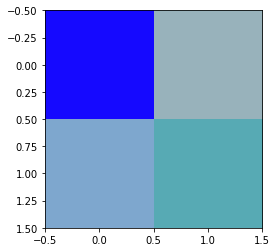

[ 0.0000000e+00  5.5172724e+19  0.0000000e+00  0.0000000e+00
 -2.3534353e+00  4.5589807e+19  1.1834570e+00  1.3747911e+00
  0.0000000e+00]
image


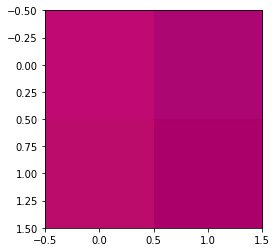

prediction


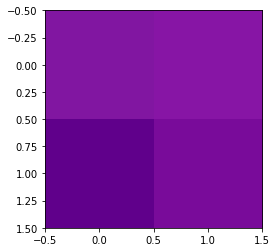

[ 2.6814070e+00  0.0000000e+00  2.6261892e+00 -2.9090402e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  2.5375646e+19
  0.0000000e+00]
image


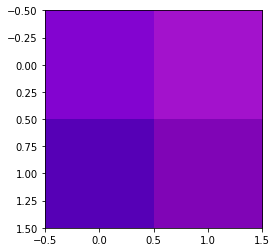

prediction


ValueError: Floating point image RGB values must be in the 0..1 range.

[-0.         0.        -2.6261892  0.         0.         0.
  0.         0.         0.       ]
image


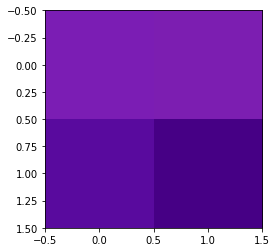

prediction


/Users/samutamminen/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


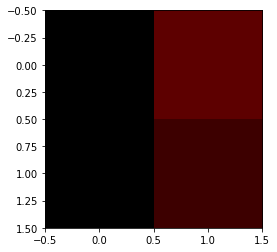

[-0.         0.        -2.6261892  0.         0.         0.
  0.         0.         0.       ]
image


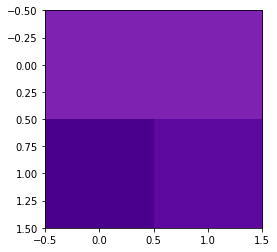

prediction


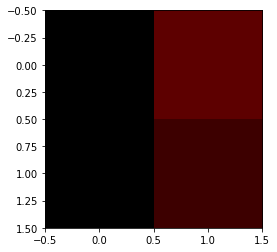

[ 0.        -2.9891248  0.         0.         0.        -0.
  0.         0.        -0.       ]
image


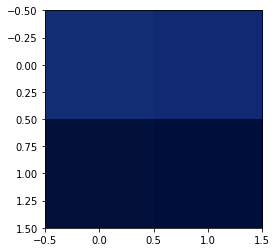

prediction


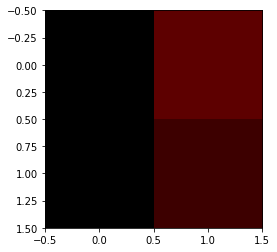

[-0.         0.         0.         0.        -2.3534355 -2.4699454
  0.        -1.3747911  0.       ]
image


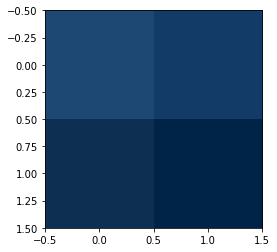

prediction


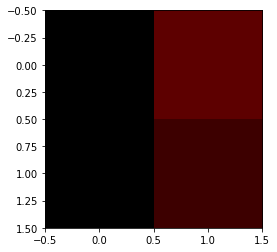

[2.6814070e+00 2.9891248e+00 2.6261892e+00 2.9090400e+00 2.3534355e+00
 2.4699454e+00 2.1844033e+19 0.0000000e+00 0.0000000e+00]
image


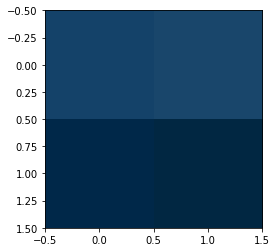

prediction


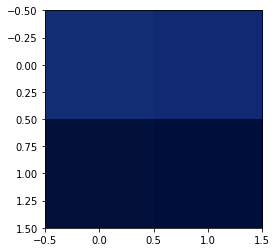

In [7]:
from sklearn.linear_model import Lasso
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv

def filterExpressedPixels(vec):
    # take only first array becouse we have only one dimension
     return np.where(vec != -100)[0]

def estimate_patch(patch, dictionary, lamb):
    imp = ImageProcessing()
    
    Y = patch.reshape(-1,1) # to make it column vector, where each line correspond one example
    #indexes = filterExpressedPixels(Y)
    
    # for learning, use only nonzero examples
    #Y_nonexp = Y[indexes].reshape(-1,1)
    X = dictionary#[indexes, :]
    
    model = Lasso(alpha=lamb,normalize=True)# tol=0.001)
    model = model.fit(X, Y) # coefficient sparse
    #return model.predict(dictionary) # puis on predire les pixels du patch
    return np.array(model.coef_)

def show_patch(patch):
    ip.show_im(ip.vector_to_patch(ip.rescale_values(patch)))

small_image = ip.get_patch(64, 64, 12,image)
ip.show_im(small_image)
grid,dictionary = ip.get_dictionary_patches(small_image, 3, 2)
#clean_dico_indexes = ip.complet_dictionary(dictionary)
#clean_dico = dictionary[:,clean_dico_indexes]
for i in range(dictionary.shape[1]):
    patch = dictionary[:,i]
    coef = estimate_patch(patch,dictionary, 0.0001)
    print(coef)

    prediction = dictionary.dot(coef)
    print("image")
    show_patch(patch)
    print("prediction")
    show_patch(prediction)

In [ ]:
small_image

In [ ]:
from sklearn.preprocessing import normalize
image_vector = ip.patch_to_vector(small_image)
print(image_vector)
#normalize(image_vector,axis=0)
print(np.float16(image_vector))

In [ ]:
(dictionary == patch.reshape(-1,1)).all()

In [ ]:
res = dictionary * estimation
ip.show_im(ip.vector_to_patch(patch))
ip.show_im(ip.vector_to_patch(res))

In [ ]:
np.where((dictionary == -100).sum(axis=0))

In [ ]:
small_image = ip.get_patch(64, 64, 48,image)


#ip.show_im(ip.reconstruct_image(dictionary, 64,64))
noise_image = ip.noise(small_image, 0.01)
ip.show_im(noise_image)

#https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge ??

print("Now inpainted one!")
from IterativeInpainting import IterativeInpainting
h = 9
step = 5
iterations = 5
alphas = [0.000001]
for a in alphas:
    inpainting = IterativeInpainting(noise_image, patch_sizes=h, step_size=step)
    inpainting.inpaint(max_iter=iterations, alpha=a)
    inpainting.show_image()

In [ ]:
print((noise_image == -100).sum())
print((inpainting.image == -100).sum())

/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/inpainting/q2_2.py:23: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = model.fit(X, Y_nonexp) # coefficient sparse
/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/samutamminen/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


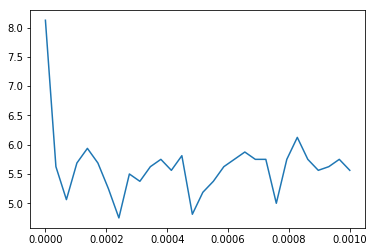

In [6]:
import matplotlib.pyplot as plt

small_image = ip.get_patch(64, 64, 48,image)

h = 9
step = 5
null_coefs = []
alphas = np.linspace(0,0.001,30)
for a in alphas:
    grid,dictionary = ip.get_dictionary_patches(small_image, h, step)
    coefs = np.array([estimate_patch(dictionary[:, i], dictionary, a) for i in range(dictionary.shape[1])])
    null_coefs.append(np.array([np.sum(c != 0) for c in coefs]).mean())
    
plt.plot(alphas,null_coefs)
plt.show()